In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier #Using MLPclassifier from sklearn
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten #search
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import math


In [3]:
train_data= pd.read_csv('C:\\Users\\HP\\Desktop\\data.csv')

In [4]:
feature_cols=['location',	'country' ,	'gender' ,	'age' ,	'vis_wuhan',	'from_wuhan',	'symptom1'	,'symptom2'	,'symptom3'	,'symptom4'	,'symptom5'	,'symptom6', 'diff_sym_hos']
x=train_data[feature_cols]
y=train_data.result
# Get 70% of the dataset as the training set. Put the remaining 30% in temporary variables: x_test and y_test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
# Split the 30% subset above into two: one half for cross validation and the other for the test set
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

We start training our classifer and make manual tuning first

In [41]:

clf_cv = MLPClassifier(hidden_layer_sizes=(5,5), learning_rate_init=0.0001, max_iter=200,random_state=42)
#Train the model using the training sets
clf_cv.fit(x_train, y_train)
#Predict the response on validation data 
y_pred_cv = clf.predict(x_validate)
# Model Accuracy: how often is the classifier correct?
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_validate, y_pred_cv))
print("Precision:",metrics.precision_score(y_validate, y_pred_cv))
print("F1 score:",metrics.f1_score(y_validate, y_pred_cv))
print("Recall:",metrics.recall_score(y_validate, y_pred_cv))
print("ROC score:",metrics.roc_auc_score(y_validate, y_pred_cv))

MLP classifier results:
Accuracy: 0.7984496124031008
Precision: 0.2727272727272727
F1 score: 0.18749999999999997
Recall: 0.14285714285714285
ROC score: 0.5343915343915344


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:

clf = MLPClassifier(hidden_layer_sizes=(5,5), learning_rate_init=0.0001, max_iter=200,random_state=42)
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy: how often is the classifier correct?
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred))

Trying large unit size like 12 layers 

In [6]:

clf1 = MLPClassifier(batch_size=10, max_iter=250, hidden_layer_sizes=(12, 8), random_state=42)
clf1.fit(x_train, y_train)
#Predicting y for X_val
y_pred1 = clf1.predict(x_test)
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("F1 score:",metrics.f1_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred1))

MLP classifier results:
Accuracy: 0.9692307692307692
Precision: 1.0
F1 score: 0.8333333333333333
Recall: 0.7142857142857143
ROC score: 0.8571428571428572


In [7]:

clf2 = MLPClassifier(batch_size=10,hidden_layer_sizes=(15,15), max_iter=200  ,random_state=42)
#Train the model using the training set
clf2.fit(x_train, y_train)
#Predict the response for test dataset
y_pred2 = clf2.predict(x_test)
# Model Accuracy: how often is the classifier correct?
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("F1 score:",metrics.f1_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred2))

MLP classifier results:
Accuracy: 0.9769230769230769
Precision: 1.0
F1 score: 0.88
Recall: 0.7857142857142857
ROC score: 0.8928571428571428


In [8]:

 clf3 = MLPClassifier(hidden_layer_sizes=(12,12), learning_rate_init=0.01, max_iter=200 ,random_state=42)
 #Train the model using the training sets
 clf3.fit(x_train, y_train)
 #Predict the response for test dataset
 y_pred3 = clf3.predict(x_test)
 # Model Accuracy: how often is the classifier correct?
 print("MLP classifier results:")
 print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
 print("Precision:",metrics.precision_score(y_test, y_pred3))
 print("F1 score:",metrics.f1_score(y_test, y_pred3))
 print("Recall:",metrics.recall_score(y_test, y_pred3))
 print("ROC score:",metrics.roc_auc_score(y_test, y_pred3))

MLP classifier results:
Accuracy: 0.9
Precision: 0.5384615384615384
F1 score: 0.5185185185185186
Recall: 0.5
ROC score: 0.7241379310344829


In [9]:
clf4 = MLPClassifier(hidden_layer_sizes=(12,10), learning_rate_init=0.01, max_iter=250 , activation='relu',random_state=42) 

clf4.fit(x_train, y_train)
#Predict the response for test dataset
y_pred4 = clf4.predict(x_test)
 # Model Accuracy: how often is the classifier correct?
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4))
print("F1 score:",metrics.f1_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred4))

MLP classifier results:
Accuracy: 0.8769230769230769
Precision: 0.25
F1 score: 0.11111111111111112
Recall: 0.07142857142857142
ROC score: 0.5227832512315271


In [10]:
clf5 = MLPClassifier(hidden_layer_sizes=(12,10), learning_rate_init=0.01, max_iter=200 , activation='logistic',random_state=42)#sigmoid 
 #Train the model using the training sets
clf5.fit(x_train, y_train)
#Predict the response for test dataset
y_pred5 = clf5.predict(x_test)
 # Model Accuracy: how often is the classifier correct?
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))
print("Precision:",metrics.precision_score(y_test, y_pred5))
print("F1 score:",metrics.f1_score(y_test, y_pred5))
print("Recall:",metrics.recall_score(y_test, y_pred5))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred5))

MLP classifier results:
Accuracy: 0.8923076923076924
Precision: 0.5
F1 score: 0.5625000000000001
Recall: 0.6428571428571429
ROC score: 0.7826354679802955


In [11]:

clf6 = MLPClassifier(hidden_layer_sizes=(12,12), learning_rate_init=0.01, max_iter=200 , activation='tanh',random_state=42) 
 #Train the model using the training sets
clf6.fit(x_train, y_train)
 #Predict the response for test dataset
y_pred6 = clf6.predict(x_test)
 # Model Accuracy: how often is the classifier correct?
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))
print("Precision:",metrics.precision_score(y_test, y_pred6))
print("F1 score:",metrics.f1_score(y_test, y_pred6))
print("Recall:",metrics.recall_score(y_test, y_pred6))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred6))

MLP classifier results:
Accuracy: 0.8923076923076924
Precision: 0.5
F1 score: 0.22222222222222224
Recall: 0.14285714285714285
ROC score: 0.562807881773399


In [18]:
clf7 = MLPClassifier(hidden_layer_sizes=(15,15), learning_rate_init=0.01, max_iter=200 , activation='tanh',learning_rate='adaptive',random_state=42) 
clf7.fit(x_train, y_train)
y_pred7 = clf7.predict(x_test)
print("MLP classifier results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred7))
print("Precision:",metrics.precision_score(y_test, y_pred7))
print("F1 score:",metrics.f1_score(y_test, y_pred7))
print("Recall:",metrics.recall_score(y_test, y_pred7))
print("ROC score:",metrics.roc_auc_score(y_test, y_pred7))

MLP classifier results:
Accuracy: 0.8923076923076924
Precision: 0.5
F1 score: 0.41666666666666663
Recall: 0.35714285714285715
ROC score: 0.6570197044334976


In [19]:
mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-4,hidden_layer_sizes=(50,50,50), random_state=1,max_iter=11,verbose=10,learning_rate_init=.1)
# increase alpha -> high variance causing overfitting
mlp.fit(x_train, y_train)
print (mlp.score(x_test,y_test))
print (mlp.n_layers_)
print (mlp.n_iter_)
print (mlp.loss_)

Iteration 1, loss = 5.45166143
Iteration 2, loss = 0.54328009
Iteration 3, loss = 0.70788776
Iteration 4, loss = 0.46248648
Iteration 5, loss = 0.49193933
Iteration 6, loss = 0.39735451
Iteration 7, loss = 0.42280558
Iteration 8, loss = 0.35094123
Iteration 9, loss = 0.36265714
Iteration 10, loss = 0.31863220
Iteration 11, loss = 0.26216602
0.9
5
11
0.26216602379481263


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,),(10,10),(15,15),(12,12,12)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init':[ 0.01,0.1,0.001,0.0001 ]
}


In [30]:

gridsearch = GridSearchCV(mlp1, parameter_space, n_jobs=-1, cv=3)
gridsearch.fit(x_train, y_train)
# Best paramete set
print('Best parameters found:\n', gridsearch.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
y_true, y_precept = y_test , gridsearch.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_precept))

Results on the test set:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       116
           1       0.89      0.57      0.70        14

    accuracy                           0.95       130
   macro avg       0.92      0.78      0.83       130
weighted avg       0.94      0.95      0.94       130



In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_precept))
print("ROC_Score:",metrics.roc_auc_score(y_test, y_precept))

Accuracy: 0.9461538461538461
ROC_Score: 0.7814039408866996


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


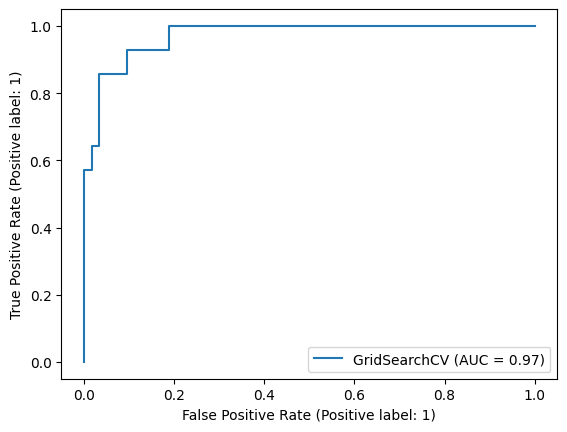

In [37]:
metrics.plot_roc_curve(gridsearch,x_test,y_test)

In [38]:

print(confusion_matrix(y_test, y_precept))
pd.crosstab(y_test, y_precept, rownames=['True'], colnames=['Predicted'], margins=True)

[[115   1]
 [  6   8]]


Predicted,0,1,All
True,,,
0,115,1,116
1,6,8,14
All,121,9,130


In [33]:

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
randomSearch = RandomizedSearchCV(mlp1, parameter_space, random_state=0)
randomSearch.fit(x_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization has

RandomizedSearchCV(estimator=MLPClassifier(max_iter=100),
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'logistic'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,), (10, 10),
                                                               (15, 15),
                                                               (12, 12, 12)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'learning_rate_init': [0.01, 0.1, 0.001,
                                                               0.0001],
                                        'solver': ['sgd', 'adam']},
                   random_state=0)

In [34]:
print('Best parameters found:\n', randomSearch.best_params_)

Best parameters found:
 {'solver': 'adam', 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.05, 'activation': 'logistic'}


In [35]:
y_true1, y_precept1 = y_test , randomSearch.predict(x_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true1, y_precept1))

Results on the test set:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       116
           1       0.00      0.00      0.00        14

    accuracy                           0.89       130
   macro avg       0.45      0.50      0.47       130
weighted avg       0.80      0.89      0.84       130



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_precept1))
print("ROC CURVE :",metrics.roc_auc_score(y_test, y_precept1))

Accuracy: 0.8923076923076924
ROC CURVE : 0.5


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


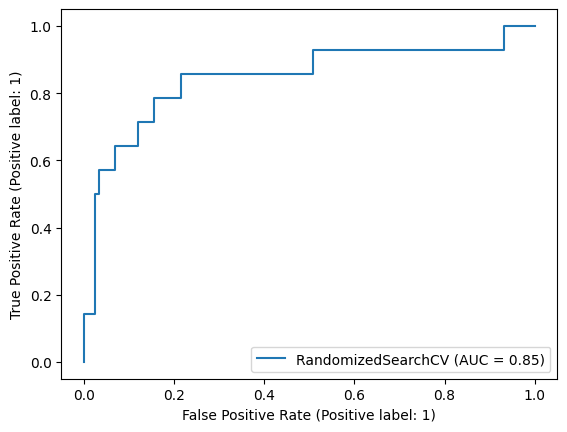

In [39]:
metrics.plot_roc_curve(randomSearch,x_test,y_test)

In [40]:
print(confusion_matrix(y_test, y_precept1))
pd.crosstab(y_test, y_precept1, rownames=['True'], colnames=['Predicted'], margins=True)

[[116   0]
 [ 14   0]]


Predicted,0,All
True,,
0,116,116
1,14,14
All,130,130
